In [71]:
library(Seurat)
library(dplyr)
library(magrittr)
IRdisplay::display_html("<style> .container { width:95% !important; } </style>")
library("ggplot2")
library("xlsx")

In [72]:
LHb.integrated<-readRDS(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/LHb_integrated_0.8.rds")

In [73]:
cntl<-readRDS("/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/cntl_0.8.rds")
stim<-readRDS("/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/stim_0.8.rds")

# assgin clusters to cell types

In [74]:
new.ident <- c("MHb1","MHb2","MHb3","LHb1","LHb2","LHb3","MHb4","LHb4","MHb5","LHb5","LHb6","MHb6","Surr1","Surr2","Surr3","Surr4")
names(x = new.ident) <- levels(x =LHb.integrated)
LHb.integrated<- RenameIdents(object =LHb.integrated, new.ident)

In [75]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(LHb.integrated@assays$RNA@data[,which(Idents(object=LHb.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_cntl",sep=""),intersect(colnames(cntl@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_stim",sep=""),intersect(colnames(stim@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))}

In [76]:
LHb.integrated<-subset(x=LHb.integrated,cells=c(MHb1_barcode,MHb2_barcode,MHb3_barcode,LHb1_barcode,LHb2_barcode,LHb3_barcode,MHb4_barcode,MHb5_barcode,LHb4_barcode,LHb5_barcode,MHb6_barcode,LHb6_barcode))

# IEG: comparing value 

MHb

In [80]:
Cell_type<-rev(c("MHb1","MHb2","MHb3","MHb4","MHb5","MHb6"))
#initialize empty data frame
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(Cell_type)){
L<-length(eval(parse(text = paste(Cell_type[i],"_barcode_cntl",sep=""))))
#replace "Fos" with gene of your interest
Cell_number_c<- data.frame("type" =c(rep(Cell_type[i],L)), "Cond" = c(rep("cntl",L)))

Cell_number_c$Fos<-LHb.integrated@assays$RNA@data["Fos",eval(parse(text = paste(Cell_type[i],"_barcode_cntl",sep="")))]
Cell_number_c$Egr1<-LHb.integrated@assays$RNA@data["Egr1",eval(parse(text = paste(Cell_type[i],"_barcode_cntl",sep="")))]
#replace "Fos" with gene of your interest
L<-length(eval(parse(text = paste(Cell_type[i],"_barcode_stim",sep=""))))
Cell_number_s<- data.frame("type" =c(rep(Cell_type[i],L)), "Cond" = c(rep("stim",L)))
Cell_number_s$Fos<-LHb.integrated@assays$RNA@data["Fos",eval(parse(text = paste(Cell_type[i],"_barcode_stim",sep="")))]
Cell_number_s$Egr1<-LHb.integrated@assays$RNA@data["Egr1",eval(parse(text = paste(Cell_type[i],"_barcode_stim",sep="")))]
# concatenate the 2
Cell_number<-rbind(Cell_number_c,Cell_number_s,Cell_number)}
as.factor(Cell_number$type)

as.factor(Cell_number$Cond)
Cell_number<-subset(Cell_number,Fos>0)

#for Egr1
#Cell_number<-subset(Cell_number,Egr1>0)

[1] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [15] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [29] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [43] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [57] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [71] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [85] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [99] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [113] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [127] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [141] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [155] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [169] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [183] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [197] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [211] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [225] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [239] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [253] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [267] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [281] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [295] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [309] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [323] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [337] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [351] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [365] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [379] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [393] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [407] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [421] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [435] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [449] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [463] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [477] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [491] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [505] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [519] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [533] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [547] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [561] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [575] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [589] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [603] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [617] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [631] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [645] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [659] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2
 [673] MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2
 [687] MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2
 [701] MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2
 [715] MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2

[1] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
  [15] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
  [29] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
  [43] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
  [57] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
  [71] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
  [85] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
  [99] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [113] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [127] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [141] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [155] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [169] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [183] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [197] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [211] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [225] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [239] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [253] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [267] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [281] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [295] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [309] cntl cntl cntl cntl cntl cntl cntl stim stim stim stim stim stim stim
 [323] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [337] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [351] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [365] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [379] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [393] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [407] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [421] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [435] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [449] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [463] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [477] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [491] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [505] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [519] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [533] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [547] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [561] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [575] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [589] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [603] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [617] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [631] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [645] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [659] stim stim stim stim stim stim stim stim cntl cntl cntl cntl cntl cntl
 [673] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [687] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [701] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [715] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl

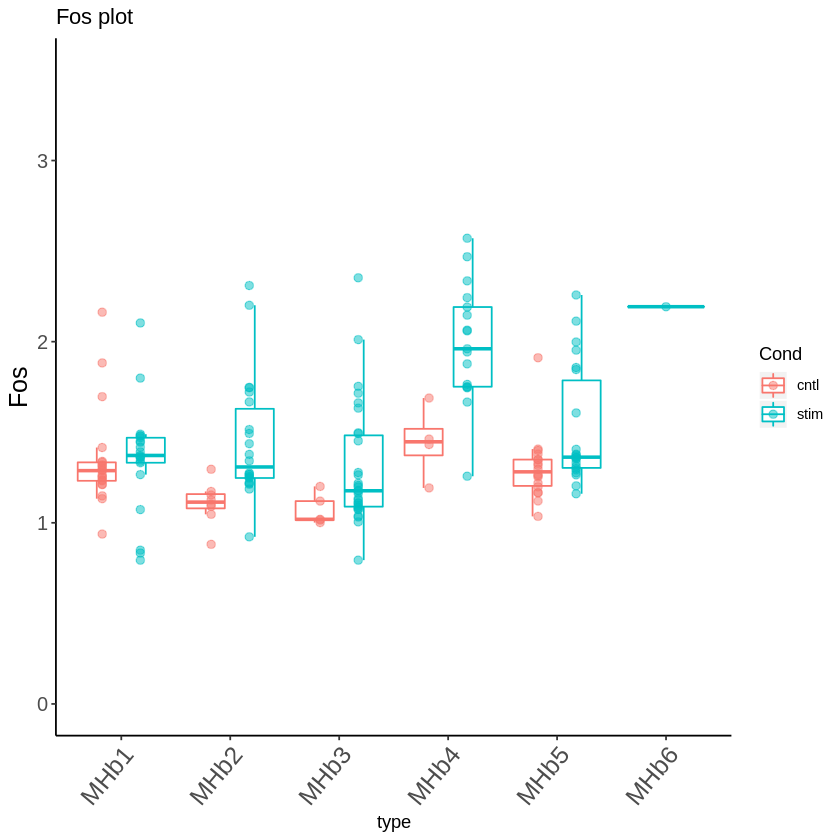

In [23]:
P<-ggplot(Cell_number,aes(x=type,y=Fos,col=Cond))
P+ scale_x_discrete() +geom_boxplot(aes(color = Cond), width = 0.7, size = 0.5,outlier.shape = NA,position = position_dodge(0.9)) +
   geom_jitter(position = position_dodge(width = .7), alpha = 0.5,size=2)+theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("Fos plot")+ylim(0,3.5)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/Fos_individual_over0_MHb.pdf",width=10,height=8)

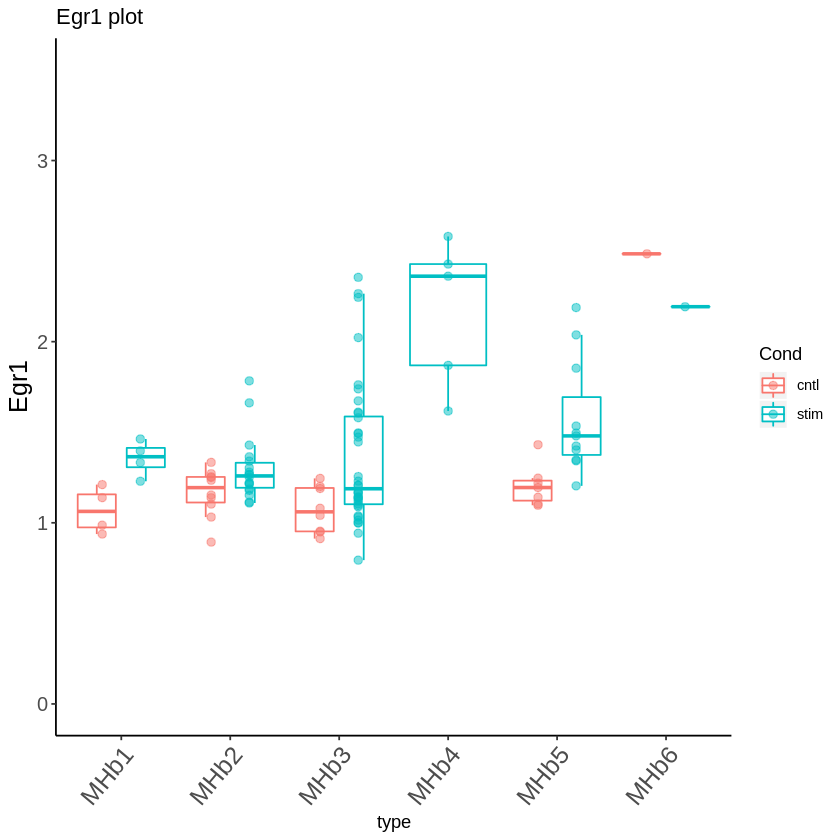

In [27]:
#for Egr1
P<-ggplot(Cell_number,aes(x=type,y=Egr1,col=Cond))
P+ scale_x_discrete() +geom_boxplot(aes(color = Cond), width = 0.7, size = 0.5,outlier.shape = NA,position = position_dodge(0.9)) +
   geom_jitter(position = position_dodge(width = .7), alpha = 0.5,size=2)+theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("Egr1 plot")+ylim(0,3.5)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/Egr1_individual_over0_MHb.pdf",width=10,height=8)

LHb

In [86]:
Cell_type<-rev(c("LHb1","LHb2","LHb3","LHb4","LHb5","LHb6"))
#initialize empty data frame
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(Cell_type)){
L<-length(eval(parse(text = paste(Cell_type[i],"_barcode_cntl",sep=""))))
#replace "Fos" with gene of your interest
Cell_number_c<- data.frame("type" =c(rep(Cell_type[i],L)), "Cond" = c(rep("cntl",L)))

Cell_number_c$Fos<-LHb.integrated@assays$RNA@data["Fos",eval(parse(text = paste(Cell_type[i],"_barcode_cntl",sep="")))]
Cell_number_c$Egr1<-LHb.integrated@assays$RNA@data["Egr1",eval(parse(text = paste(Cell_type[i],"_barcode_cntl",sep="")))]
#replace "Fos" with gene of your interest
L<-length(eval(parse(text = paste(Cell_type[i],"_barcode_stim",sep=""))))
Cell_number_s<- data.frame("type" =c(rep(Cell_type[i],L)), "Cond" = c(rep("stim",L)))
Cell_number_s$Fos<-LHb.integrated@assays$RNA@data["Fos",eval(parse(text = paste(Cell_type[i],"_barcode_stim",sep="")))]
Cell_number_s$Egr1<-LHb.integrated@assays$RNA@data["Egr1",eval(parse(text = paste(Cell_type[i],"_barcode_stim",sep="")))]
# concatenate the 2
Cell_number<-rbind(Cell_number_c,Cell_number_s,Cell_number)}
as.factor(Cell_number$type)

as.factor(Cell_number$Cond)

Cell_number<-subset(Cell_number,Fos>0)

#for Egr1
#Cell_number<-subset(Cell_number,Egr1>0)

[1] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
  [15] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
  [29] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
  [43] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
  [57] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
  [71] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
  [85] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
  [99] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [113] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [127] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [141] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [155] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [169] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [183] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [197] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [211] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [225] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [239] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [253] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [267] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [281] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [295] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [309] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [323] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [337] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [351] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [365] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [379] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [393] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [407] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [421] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [435] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [449] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [463] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [477] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [491] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [505] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [519] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [533] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1
 [547] LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb1 LHb2 LHb2
 [561] LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2
 [575] LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2
 [589] LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2
 [603] LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2
 [617] LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2
 [631] LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2
 [645] LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2
 [659] LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2
 [673] LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2
 [687] LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2
 [701] LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2
 [715] LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2 LHb2

[1] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
  [15] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
  [29] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
  [43] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
  [57] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
  [71] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
  [85] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
  [99] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [113] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [127] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [141] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [155] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [169] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [183] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [197] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [211] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [225] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [239] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [253] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [267] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [281] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [295] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [309] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [323] cntl cntl cntl cntl cntl cntl cntl stim stim stim stim stim stim stim
 [337] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [351] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [365] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [379] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [393] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [407] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [421] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [435] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [449] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [463] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [477] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [491] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [505] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [519] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [533] stim stim stim stim stim stim stim stim stim stim stim stim stim stim
 [547] stim stim stim stim stim stim stim stim stim stim stim stim cntl cntl
 [561] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [575] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [589] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [603] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [617] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [631] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [645] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [659] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [673] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [687] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [701] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl
 [715] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl

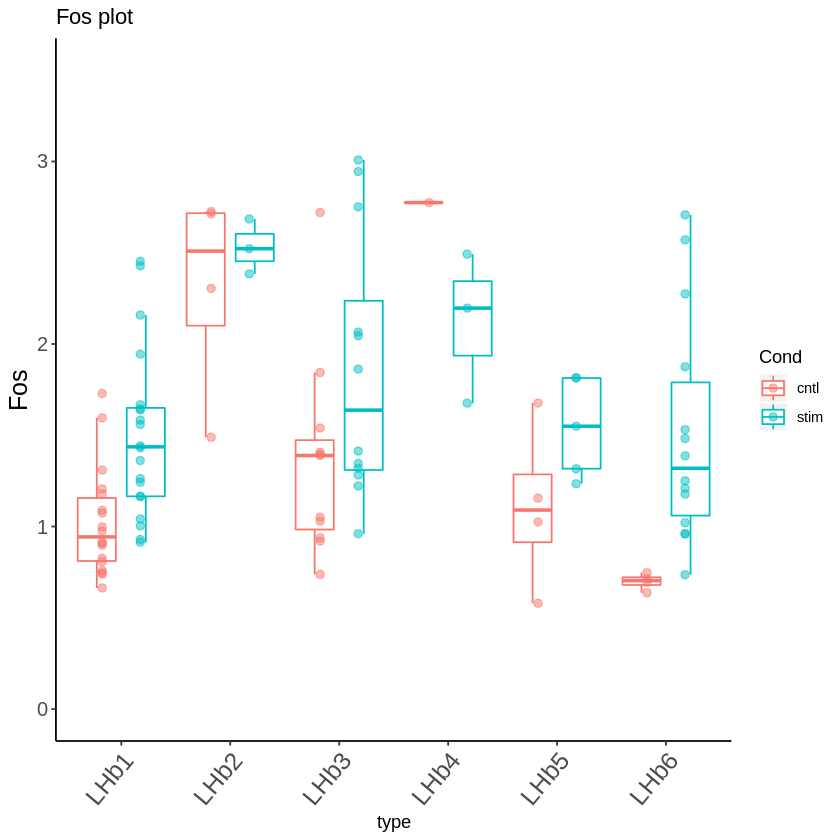

In [46]:
P<-ggplot(Cell_number,aes(x=type,y=Fos,col=Cond))
P+ scale_x_discrete() +geom_boxplot(aes(color = Cond), width = 0.7, size = 0.5,outlier.shape = NA,position = position_dodge(0.9)) +
   geom_jitter(position = position_dodge(width = .7), alpha = 0.5,size=2)+theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("Fos plot")+ylim(0,3.5)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/Fos_individual_over0_LHb.pdf",width=10,height=8)

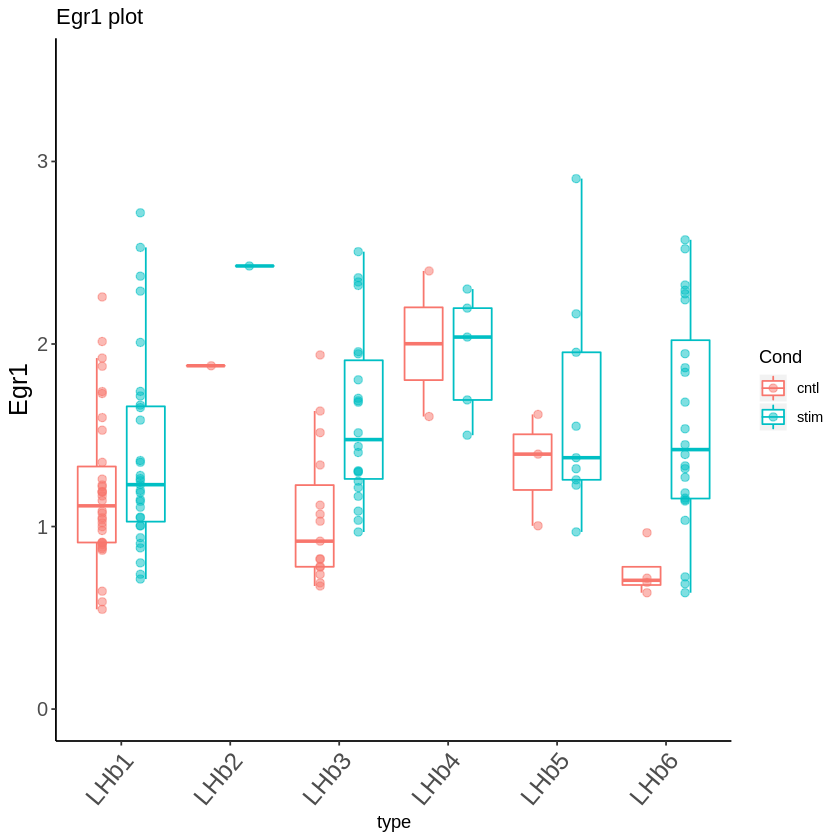

In [50]:
#for Egr1
P<-ggplot(Cell_number,aes(x=type,y=Egr1,col=Cond))
P+ scale_x_discrete() +geom_boxplot(aes(color = Cond), width = 0.7, size = 0.5,outlier.shape = NA,position = position_dodge(0.9)) +
   geom_jitter(position = position_dodge(width = .7), alpha = 0.5,size=2)+theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("Egr1 plot")+ylim(0,3.5)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/Egr1_individual_over0_LHb.pdf",width=10,height=8)

# Statistics

In [133]:
#every time you run below, you go back to redefine Cell_number to run statistics

In [79]:
# wilcoxon rank sum
Cell_type<-c("MHb1","MHb2","MHb3","MHb4","MHb5","MHb6")
Fos_stats<- data.frame("type" =Cell_type)
p_value<-numeric()
for (i in 1:length(Cell_type)){
   temp1<-subset(Cell_number,type==Cell_type[i] & Cond=="cntl")
temp2<-subset(Cell_number,type==Cell_type[i] & Cond=="stim")
    if(dim(temp1)[1]>0 & dim(temp2)[1]>0){
res <-wilcox.test(temp1$Fos, temp2$Fos, alternative = "two.sided")
    p_value[i]<-length(Cell_type)*res$p.value}else{
        p_value[i]<-"NA"
    }
}
Fos_stats$p_vlaue_bonf_wilcox <-p_value
write.xlsx2(Fos_stats,file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/Fos_stats_all_neurons_wilconxon_bonf_MHb_Fig6Final.xlsx")

Warning message in wilcox.test.default(temp1$Fos, temp2$Fos, alternative = "two.sided"):
“cannot compute exact p-value with ties”

In [82]:
# wilcoxon rank sum
Cell_type<-c("MHb1","MHb2","MHb3","MHb4","MHb5","MHb6")
Fos_stats<- data.frame("type" =Cell_type)
p_value<-numeric()
for (i in 1:length(Cell_type)){
   temp1<-subset(Cell_number,type==Cell_type[i] & Cond=="cntl")
temp2<-subset(Cell_number,type==Cell_type[i] & Cond=="stim")
    if(dim(temp1)[1]>0 & dim(temp2)[1]>0){
res <-wilcox.test(temp1$Egr1, temp2$Egr1, alternative = "two.sided")
    p_value[i]<-length(Cell_type)*res$p.value}else{
        p_value[i]<-"NA"
    }
}
Fos_stats$p_vlaue_bonf_wilcox <-p_value
write.xlsx2(Fos_stats,file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/Egr1_stats_all_neurons_wilconxon_bonf_MHb_Fig6_final.xlsx")

In [85]:
# wilcoxon rank sum
Cell_type<-c("LHb1","LHb2","LHb3","LHb4","LHb5","LHb6")
Fos_stats<- data.frame("type" =Cell_type)
p_value<-numeric()
for (i in 1:length(Cell_type)){
   temp1<-subset(Cell_number,type==Cell_type[i] & Cond=="cntl")
temp2<-subset(Cell_number,type==Cell_type[i] & Cond=="stim")
    if(dim(temp1)[1]>0 & dim(temp2)[1]>0){
res <-wilcox.test(temp1$Fos, temp2$Fos, alternative = "two.sided")
    p_value[i]<-length(Cell_type)*res$p.value}else{
        p_value[i]<-"NA"
    }
}
Fos_stats$p_vlaue_bonf_wilcox <-p_value
write.xlsx2(Fos_stats,file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/Fos_stats_all_neurons_wilconxon_bonf_LHb_FIg6_fianl.xlsx")

In [88]:
# wilcoxon rank sum
Cell_type<-c("LHb1","LHb2","LHb3","LHb4","LHb5","LHb6")
Fos_stats<- data.frame("type" =Cell_type)
p_value<-numeric()
for (i in 1:length(Cell_type)){
   temp1<-subset(Cell_number,type==Cell_type[i] & Cond=="cntl")
temp2<-subset(Cell_number,type==Cell_type[i] & Cond=="stim")
    if(dim(temp1)[1]>0 & dim(temp2)[1]>0){
res <-wilcox.test(temp1$Egr1, temp2$Egr1, alternative = "two.sided")
    p_value[i]<-length(Cell_type)*res$p.value}else{
        p_value[i]<-"NA"
    }
}
Fos_stats$p_vlaue_bonf_wilcox <-p_value
write.xlsx2(Fos_stats,file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/Egr1_stats_all_neurons_wilconxon_bonf_LHb_Fig6FInal.xlsx")

Warning message in wilcox.test.default(temp1$Egr1, temp2$Egr1, alternative = "two.sided"):
“cannot compute exact p-value with ties”

# Fos proportion

MHb

In [63]:
Cell_type<-c("MHb1","MHb2","MHb3","MHb4","MHb5","MHb6")
# make a data frame for cell number (this data frame is a simple version giving single value for each cluster) 
Cell_number<- data.frame("type" =c(Cell_type,Cell_type), "Cond" = c(rep("cntl",length(Cell_type)),rep("stim",length(Cell_type))))
# be careful with how you define factor and levels
as.factor(Cell_number$type)
as.factor(Cell_number$Cond)
levels(Cell_number$type)<-c("MHb1","MHb2","MHb3","MHb4","MHb5","MHb6")

Numberofcells<-vector(mode="numeric", length=0)
proportion<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){Numberofcells[i]<-length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))}
Cell_number$len<-Numberofcells

for (i in 1:dim(Cell_number)[1]){if (Cell_number$Cond[i]=="cntl"){proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("cntl",Cell_number$Cond)])} else {proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("stim",Cell_number$Cond)])}}
Cell_number$prop<-proportion


[1] MHb1 MHb2 MHb3 MHb4 MHb5 MHb6 MHb1 MHb2 MHb3 MHb4 MHb5 MHb6
Levels: MHb1 MHb2 MHb3 MHb4 MHb5 MHb6

[1] cntl cntl cntl cntl cntl cntl stim stim stim stim stim stim
Levels: cntl stim

In [64]:
#using unaligned
Fos_raw<-vector(mode="numeric",length=0)
Fos_raw_number<-vector(mode="numeric",length=0)
for (i in 1:dim(Cell_number)[1]){Fos_raw[i]<-100*sum(LHb.integrated@assays$RNA@data["Fos",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]
    Fos_raw_number[i]<-sum(LHb.integrated@assays$RNA@data["Fos",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)                            }
Cell_number$Fos_raw<-Fos_raw
Cell_number$Fos_raw_number<-Fos_raw_number

Egr1_raw<-vector(mode="numeric",length=0)
Egr1_raw_number<-vector(mode="numeric",length=0)
for (i in 1:dim(Cell_number)[1]){Egr1_raw[i]<-100*sum(LHb.integrated@assays$RNA@data["Egr1",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]
         Egr1_raw_number[i]<-sum(LHb.integrated@assays$RNA@data["Egr1",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)   }
Cell_number$Egr1_raw<-Egr1_raw
Cell_number$Egr1_raw_number<-Egr1_raw_number
Cell_number$Fos_raw_negative<-Cell_number$len-Cell_number$Fos_raw_number
Cell_number$Egr1_raw_negative<-Cell_number$len-Cell_number$Egr1_raw_number
Cell_number

type,Cond,len,prop,Fos_raw,Fos_raw_number,Egr1_raw,Egr1_raw_number,Fos_raw_negative,Egr1_raw_negative
MHb1,cntl,315,24.15644,6.666667,21,1.2698413,4,294,311
MHb2,cntl,264,20.24540,3.030303,8,3.7878788,10,256,254
MHb3,cntl,270,20.70552,1.851852,5,2.9629630,8,265,262
MHb4,cntl,148,11.34969,2.702703,4,0.0000000,0,144,148
MHb5,cntl,165,12.65337,10.909091,18,4.2424242,7,147,158
MHb6,cntl,142,10.88957,0.000000,0,0.7042254,1,142,141
MHb1,stim,351,20.86801,5.982906,21,1.1396011,4,330,347
MHb2,stim,398,23.66231,5.527638,22,4.5226131,18,376,380
MHb3,stim,351,20.86801,8.547009,30,10.2564103,36,321,315
MHb4,stim,264,15.69560,6.439394,17,1.8939394,5,247,259


In [65]:
# statistics

Cell_type<-c("MHb1","MHb2","MHb3","MHb4","MHb5","MHb6")

IEG<- data.frame("type" =Cell_type)
# be careful with how you define factor and levels
as.factor(Cell_number$type)
levels(Cell_number$type)<-c("MHb1","MHb2","MHb3","MHb4","MHb5","MHb6")

Fisher_p_Fos<-vector(mode="numeric", length=0)
Chi_p_Fos<-vector(mode="numeric", length=0)
Fisher_p_Egr1<-vector(mode="numeric", length=0)
Chi_p_Egr1<-vector(mode="numeric", length=0)

for (i in 1:length(Cell_type)){
    tempc<-subset(Cell_number,type==IEG$type[i] & Cond=="cntl")
temps<-subset(Cell_number,type==IEG$type[i] & Cond=="stim")
test = matrix(c(tempc$Fos_raw_number,tempc$Fos_raw_negative,temps$Fos_raw_number,temps$Fos_raw_negative), ncol=2)
temp_f<-fisher.test(test)
temp_c<-chisq.test(test)
    Fisher_p_Fos[i]<-temp_f$p.value*length(Cell_type)
    Chi_p_Fos[i]<-temp_c$p.value*length(Cell_type)
    # repeat with Egr1
    
test = matrix(c(tempc$Egr1_raw_number,tempc$Egr1_raw_negative,temps$Egr1_raw_number,temps$Egr1_raw_negative), ncol=2)
temp_f<-fisher.test(test)
temp_c<-chisq.test(test)
    Fisher_p_Egr1[i]<-temp_f$p.value*length(Cell_type)
    Chi_p_Egr1[i]<-temp_c$p.value*length(Cell_type)
}
IEG$Fisher_p_Fos<-Fisher_p_Fos
IEG$Chi_p_Fos<-Chi_p_Fos

IEG$Fisher_p_Egr1<-Fisher_p_Egr1
IEG$Chi_p_Egr1<-Chi_p_Egr1


[1] MHb1 MHb2 MHb3 MHb4 MHb5 MHb6 MHb1 MHb2 MHb3 MHb4 MHb5 MHb6
Levels: MHb1 MHb2 MHb3 MHb4 MHb5 MHb6

Warning message in chisq.test(test):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test):
“Chi-squared approximation may be incorrect”

In [66]:
write.xlsx2(IEG,file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/Cell_Number_MHb_neurons_IEG_stats.xlsx")

png 
  2

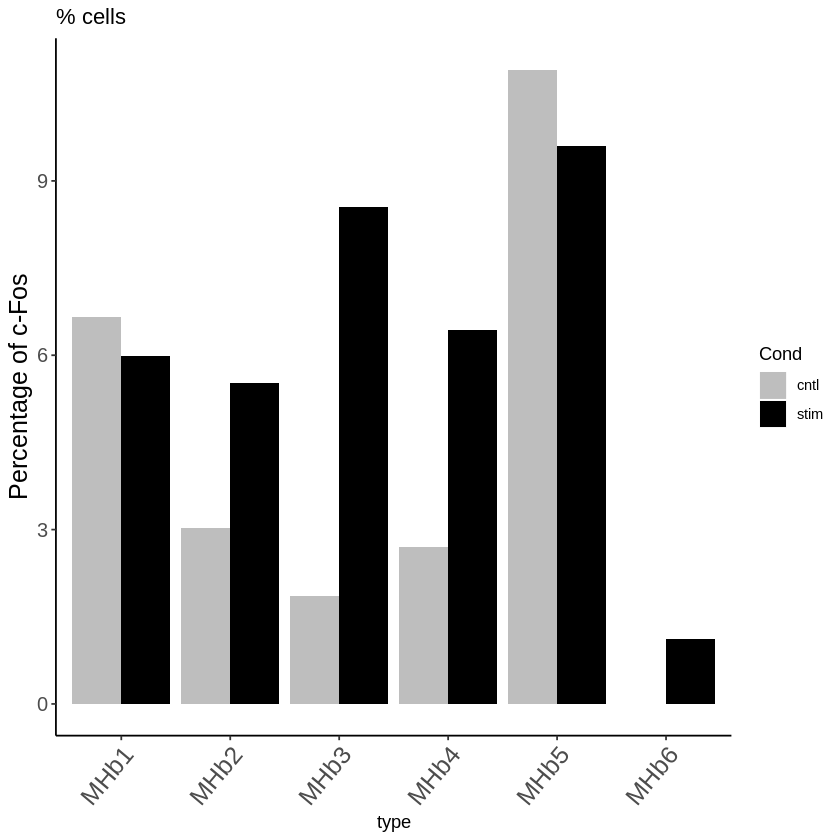

In [29]:
# proportion of c-fos_raw
ggplot(Cell_number,aes(x=type,y=Fos_raw,fill=Cond))+geom_bar(stat = "identity",position=position_dodge())+ylab("Percentage of c-Fos")+theme(axis.text.x=element_text(size=10,angle = 50, hjust = 1))+ggtitle("Fos_raw (%)")+scale_fill_manual(values=c("grey", "black"))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
dev.copy2pdf(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/percentage of Fos_raw_MHb.pdf")

png 
  2

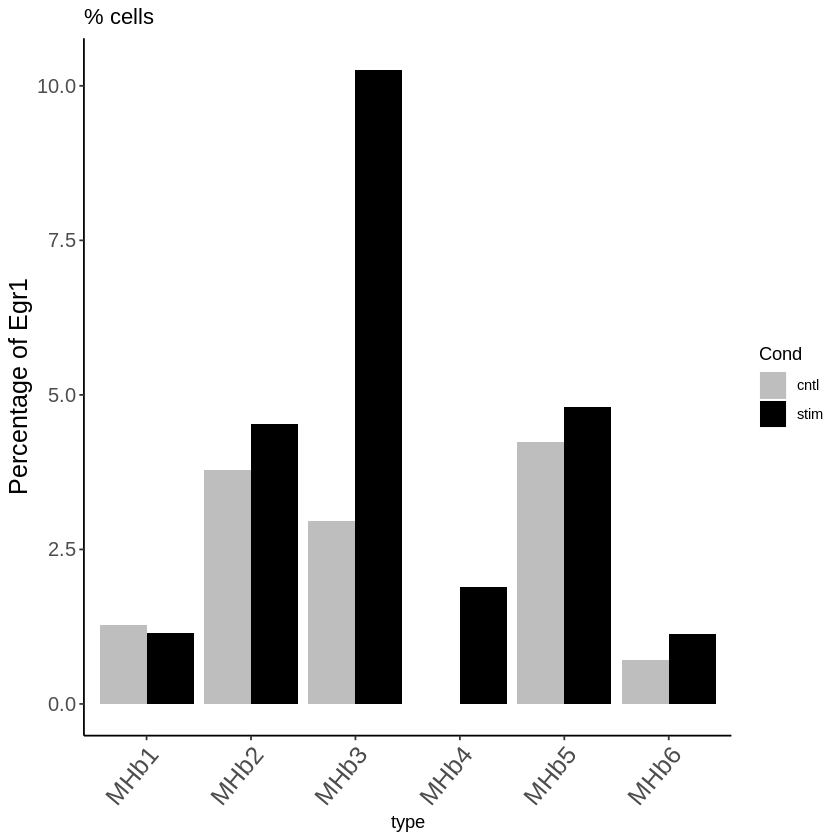

In [30]:
# proportion of Egr1_raw
ggplot(Cell_number,aes(x=type,y=Egr1_raw,fill=Cond))+geom_bar(stat = "identity",position=position_dodge())+ylab("Percentage of Egr1")+theme(axis.text.x=element_text(size=10,angle = 50, hjust = 1))+ggtitle("Fos_raw (%)")+scale_fill_manual(values=c("grey", "black"))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
dev.copy2pdf(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/percentage of Egr1_raw_MHb.pdf")

LHb

In [67]:
Cell_type<-c("LHb1","LHb2","LHb3","LHb4","LHb5","LHb6")
# make a data frame for cell number (this data frame is a simple version giving single value for each cluster) 
Cell_number<- data.frame("type" =c(Cell_type,Cell_type), "Cond" = c(rep("cntl",length(Cell_type)),rep("stim",length(Cell_type))))
# be careful with how you define factor and levels
as.factor(Cell_number$type)
as.factor(Cell_number$Cond)
levels(Cell_number$type)<-c("LHb1","LHb2","LHb3","LHb4","LHb5","LHb6")

Numberofcells<-vector(mode="numeric", length=0)
proportion<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){Numberofcells[i]<-length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))}
Cell_number$len<-Numberofcells

for (i in 1:dim(Cell_number)[1]){if (Cell_number$Cond[i]=="cntl"){proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("cntl",Cell_number$Cond)])} else {proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("stim",Cell_number$Cond)])}}
Cell_number$prop<-proportion

[1] LHb1 LHb2 LHb3 LHb4 LHb5 LHb6 LHb1 LHb2 LHb3 LHb4 LHb5 LHb6
Levels: LHb1 LHb2 LHb3 LHb4 LHb5 LHb6

[1] cntl cntl cntl cntl cntl cntl stim stim stim stim stim stim
Levels: cntl stim

In [68]:
#using unaligned
Fos_raw<-vector(mode="numeric",length=0)
Fos_raw_number<-vector(mode="numeric",length=0)
for (i in 1:dim(Cell_number)[1]){Fos_raw[i]<-100*sum(LHb.integrated@assays$RNA@data["Fos",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]
    Fos_raw_number[i]<-sum(LHb.integrated@assays$RNA@data["Fos",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)                            }
Cell_number$Fos_raw<-Fos_raw
Cell_number$Fos_raw_number<-Fos_raw_number

Egr1_raw<-vector(mode="numeric",length=0)
Egr1_raw_number<-vector(mode="numeric",length=0)
for (i in 1:dim(Cell_number)[1]){Egr1_raw[i]<-100*sum(LHb.integrated@assays$RNA@data["Egr1",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]
         Egr1_raw_number[i]<-sum(LHb.integrated@assays$RNA@data["Egr1",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)   }
Cell_number$Egr1_raw<-Egr1_raw
Cell_number$Egr1_raw_number<-Egr1_raw_number
Cell_number$Fos_raw_negative<-Cell_number$len-Cell_number$Fos_raw_number
Cell_number$Egr1_raw_negative<-Cell_number$len-Cell_number$Egr1_raw_number
Cell_number

type,Cond,len,prop,Fos_raw,Fos_raw_number,Egr1_raw,Egr1_raw_number,Fos_raw_negative,Egr1_raw_negative
LHb1,cntl,329,24.13793,5.4711246,18,10.3343465,34,311,295
LHb2,cntl,279,20.46955,1.4336918,4,0.3584229,1,275,278
LHb3,cntl,217,15.92076,5.0691244,11,6.9124424,15,206,202
LHb4,cntl,214,15.70066,0.4672897,1,0.9345794,2,213,212
LHb5,cntl,150,11.00514,2.6666667,4,2.0000000,3,146,147
LHb6,cntl,174,12.76596,2.2988506,4,2.2988506,4,170,170
LHb1,stim,229,18.94127,8.7336245,20,13.5371179,31,209,198
LHb2,stim,178,14.72291,1.6853933,3,0.5617978,1,175,177
LHb3,stim,222,18.36228,5.4054054,12,9.9099099,22,210,200
LHb4,stim,185,15.30190,1.6216216,3,2.7027027,5,182,180


[1] LHb1 LHb2 LHb3 LHb4 LHb5 LHb6 LHb1 LHb2 LHb3 LHb4 LHb5 LHb6
Levels: LHb1 LHb2 LHb3 LHb4 LHb5 LHb6

Warning message in chisq.test(test):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test):
“Chi-squared approximation may be incorrect”

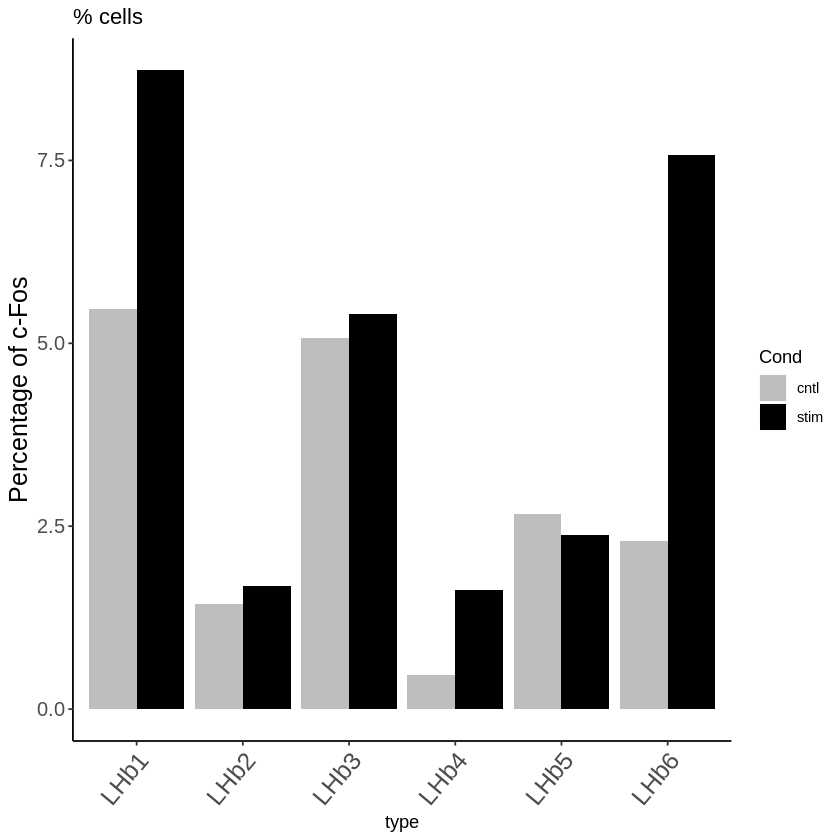

In [69]:
# statistics

Cell_type<-c("LHb1","LHb2","LHb3","LHb4","LHb5","LHb6")

IEG<- data.frame("type" =Cell_type)
# be careful with how you define factor and levels
as.factor(Cell_number$type)
levels(Cell_number$type)<-c("LHb1","LHb2","LHb3","LHb4","LHb5","LHb6")

Fisher_p_Fos<-vector(mode="numeric", length=0)
Chi_p_Fos<-vector(mode="numeric", length=0)
Fisher_p_Egr1<-vector(mode="numeric", length=0)
Chi_p_Egr1<-vector(mode="numeric", length=0)

for (i in 1:length(Cell_type)){
    tempc<-subset(Cell_number,type==IEG$type[i] & Cond=="cntl")
temps<-subset(Cell_number,type==IEG$type[i] & Cond=="stim")
test = matrix(c(tempc$Fos_raw_number,tempc$Fos_raw_negative,temps$Fos_raw_number,temps$Fos_raw_negative), ncol=2)
temp_f<-fisher.test(test)
temp_c<-chisq.test(test)
    Fisher_p_Fos[i]<-temp_f$p.value*length(Cell_type)
    Chi_p_Fos[i]<-temp_c$p.value*length(Cell_type)
    # repeat with Egr1
    
test = matrix(c(tempc$Egr1_raw_number,tempc$Egr1_raw_negative,temps$Egr1_raw_number,temps$Egr1_raw_negative), ncol=2)
temp_f<-fisher.test(test)
temp_c<-chisq.test(test)
    Fisher_p_Egr1[i]<-temp_f$p.value*length(Cell_type)
    Chi_p_Egr1[i]<-temp_c$p.value*length(Cell_type)
}
IEG$Fisher_p_Fos<-Fisher_p_Fos
IEG$Chi_p_Fos<-Chi_p_Fos
ggplot(Cell_number,aes(x=type,y=Fos_raw,fill=Cond))+geom_bar(stat = "identity",position=position_dodge())+ylab("Percentage of c-Fos")+theme(axis.text.x=element_text(size=10,angle = 50, hjust = 1))+ggtitle("Fos_raw (%)")+scale_fill_manual(values=c("grey", "black"))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")

IEG$Fisher_p_Egr1<-Fisher_p_Egr1
IEG$Chi_p_Egr1<-Chi_p_Egr1

In [70]:
write.xlsx2(IEG,file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/LHb_IEGproportion_Cell_Number_LHb_neurons_IEG_stats.xlsx")

png 
  2

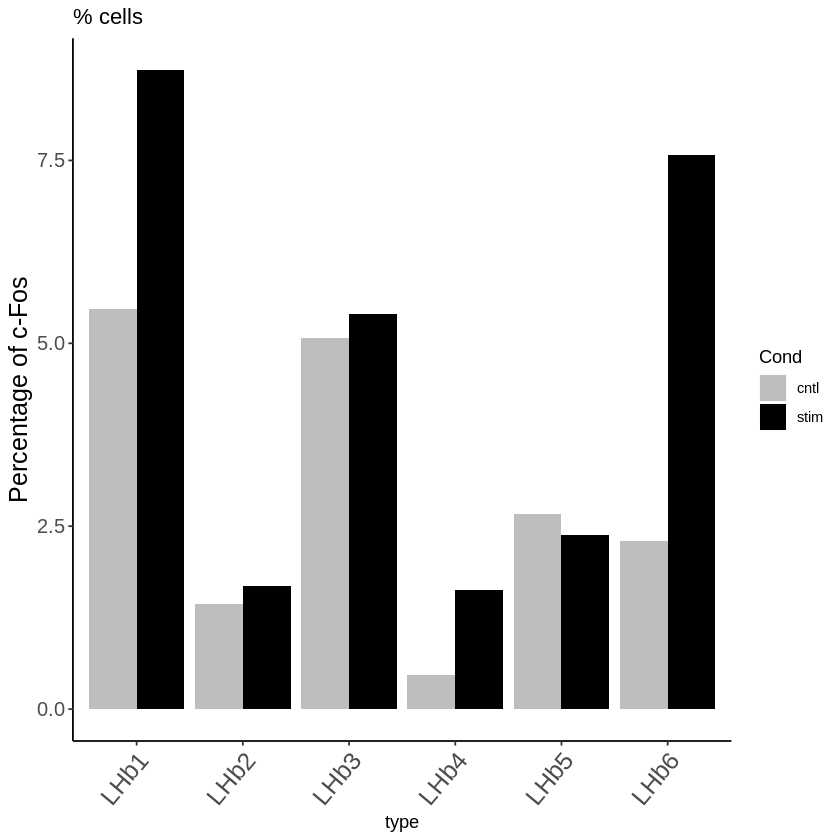

In [23]:
#Fos
ggplot(Cell_number,aes(x=type,y=Fos_raw,fill=Cond))+geom_bar(stat = "identity",position=position_dodge())+ylab("Percentage of c-Fos")+theme(axis.text.x=element_text(size=10,angle = 50, hjust = 1))+ggtitle("Fos_raw (%)")+scale_fill_manual(values=c("grey", "black"))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
dev.copy2pdf(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/percentage of Fos_raw_LHb.pdf")

png 
  2

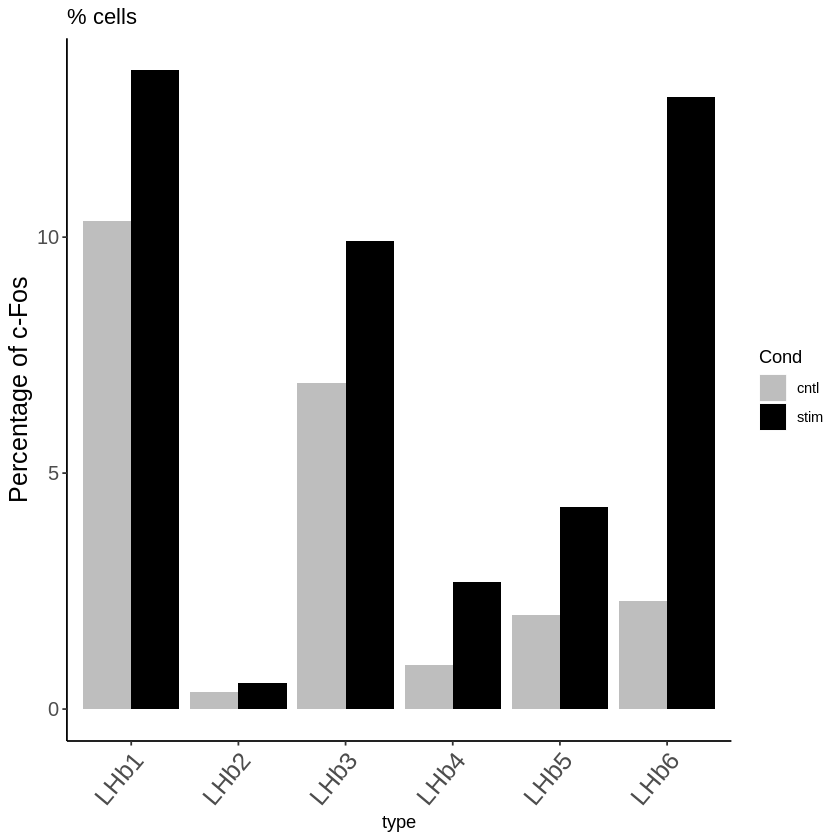

In [24]:
#Egr1
ggplot(Cell_number,aes(x=type,y=Egr1_raw,fill=Cond))+geom_bar(stat = "identity",position=position_dodge())+ylab("Percentage of c-Fos")+theme(axis.text.x=element_text(size=10,angle = 50, hjust = 1))+ggtitle("Fos_raw (%)")+scale_fill_manual(values=c("grey", "black"))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
dev.copy2pdf(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/percentage of Egr1_raw_LHb.pdf")